In [89]:
# Import required packages/modules
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
import math
from itertools import chain
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [87]:
# Define features for later models
max_features = 15000 + 3
max_len = 10
batch_size = 32

In [6]:
# Set working directory and import csv
os.chdir("C:/Users/LynchZ20/Desktop/Courses/MSDS/SY_S2/ML/FinalProject/COVID19_DeepLearning/")
dd = pd.read_csv("final.csv")

In [115]:
len(dd['deaths'].unique())

89

In [13]:
# Look at summary info
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26403 entries, 0 to 26402
Data columns (total 7 columns):
date      26403 non-null object
county    26403 non-null object
state     26403 non-null object
cases     26403 non-null int64
deaths    26403 non-null int64
type      21368 non-null object
SAH       26403 non-null int64
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


In [140]:
field = 'deaths'
ind = dd[field].unique()
ind.sort()
ind = pd.DataFrame({'value': ind, 'index': [i for i in range(len(ind))]})
ind

,value,index
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
84,672,84
85,776,85
86,914,86
87,1096,87


In [149]:
[int(x) for x in map(lambda x: ind.loc[ind['value'] == x,'index'], [776, 914, 1096])]

[85, 86, 87]

In [150]:
# Create a feature and label set w/ padding by county
counties = dd['county'].unique()
counties.sort()

field = 'deaths'
ind = dd[field].unique()
ind.sort()
ind = pd.DataFrame({'value': ind, 'index': [i for i in range(len(ind))]})

mm = max(dd['county'].value_counts())
feature = []
for county in counties:
    tmp = list(dd.loc[dd['county'] == county,field])
    pad = mm - len(tmp)
    if pad > 0:
        tmp.insert(0, list(np.repeat(0, mm - len(tmp))))
        new_tmp = []
        for obj in tmp:
            if type(obj) == list:
                for item in obj:
                    new_tmp.append(item)
            else:
                new_tmp.append(obj)
    new_tmp = [int(x) for x in map(lambda x: ind.loc[ind['value'] == x,'index'],new_tmp)]
    feature.append(new_tmp)
feature = np.array(feature)

label = []
for county in counties:
    tmp = dd.loc[dd['county'] == county,'SAH']
    label.append(max(list(tmp)))
label = np.array(label)

In [151]:
# Split into training and validation
train_rows = sample(range(feature.shape[0]), math.floor(0.7*feature.shape[0]))
test_rows = [i for i in range(feature.shape[0]) if i not in train_rows]

x_train = np.array(feature[train_rows])
y_train = np.array(label[train_rows])
x_test = np.array(feature[test_rows])
y_test = np.array(label[test_rows])

x_train = tf.convert_to_tensor(x_train, tf.float32)
x_test = tf.convert_to_tensor(x_test, tf.float32)

In [160]:
# A) Shallow Model
model = models.Sequential()
model.add(layers.Embedding(92, 8))
model.add(layers.SimpleRNN(8, dropout=0.3, recurrent_dropout=0.2, kernel_regularizer=l2(0.1), return_sequences=True))
model.add(layers.SimpleRNN(8, dropout=0.3, recurrent_dropout=0.2, kernel_regularizer=l2(0.1), return_sequences=True))
model.add(layers.Dense(1, activation='sigmoid'))

In [161]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [162]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=11,
                    validation_data=(x_test, y_test)
                   )

Train on 981 samples, validate on 421 samples
Epoch 1/10
981/981 [==============================] - 40s 40ms/sample - loss: 1.8448 - accuracy: 0.5817 - val_loss: 1.5203 - val_accuracy: 0.7268
Epoch 2/10
981/981 [==============================] - 34s 34ms/sample - loss: 1.3651 - accuracy: 0.6455 - val_loss: 1.1242 - val_accuracy: 0.7268
Epoch 3/10
981/981 [==============================] - 33s 34ms/sample - loss: 1.0402 - accuracy: 0.6709 - val_loss: 0.8669 - val_accuracy: 0.7268
Epoch 4/10
981/981 [==============================] - 34s 35ms/sample - loss: 0.8188 - accuracy: 0.6892 - val_loss: 0.7083 - val_accuracy: 0.7268
Epoch 5/10
981/981 [==============================] - 35s 36ms/sample - loss: 0.6926 - accuracy: 0.6936 - val_loss: 0.6285 - val_accuracy: 0.7268
Epoch 6/10
981/981 [==============================] - 36s 37ms/sample - loss: 0.6437 - accuracy: 0.6929 - val_loss: 0.5988 - val_accuracy: 0.7268
Epoch 7/10
981/981 [==============================] - 37s 38ms/sample - loss: 

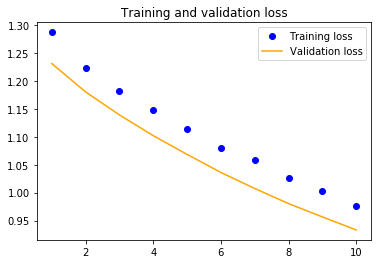

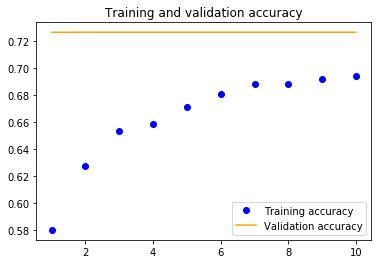

In [159]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()